In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from copy import deepcopy
from scipy import stats
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [2]:
from platform import python_version
print(python_version())

3.10.9


In [3]:
dataset = pd.read_csv('titanic.csv')
dataset = dataset.rename(
    columns={
        'PassengerId': 'Пассажиры',
        'Survived': 'Выжившие',
        'Pclass': 'Класс',
        'Name': 'Имя',
        'Sex': 'Пол',
        'Age': 'Возраст',
        'SibSp': 'Кол-во братьев, сестер и т.д.',
        'Parch': 'Кол-во родителей, детей',
        'Ticket': 'Номер билета',
        'Fare': 'Плата',
        'Cabin': 'Каюта',
        'Embarked': 'Порт посадки'
    }
)
dataset

,Пассажиры,Выжившие,Класс,Имя,Пол,Возраст,"Кол-во братьев, сестер и т.д.","Кол-во родителей, детей",Номер билета,Плата,Каюта,Порт посадки
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset.describe()

,Пассажиры,Выжившие,Класс,Возраст,"Кол-во братьев, сестер и т.д.","Кол-во родителей, детей",Плата
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Пассажиры                      891 non-null    int64  
 1   Выжившие                       891 non-null    int64  
 2   Класс                          891 non-null    int64  
 3   Имя                            891 non-null    object 
 4   Пол                            891 non-null    object 
 5   Возраст                        714 non-null    float64
 6   Кол-во братьев, сестер и т.д.  891 non-null    int64  
 7   Кол-во родителей, детей        891 non-null    int64  
 8   Номер билета                   891 non-null    object 
 9   Плата                          891 non-null    float64
 10  Каюта                          204 non-null    object 
 11  Порт посадки                   889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 8

Non-Null Count - число непропущенных данных

In [6]:
# для того, чтобы индексы не мешали проверке на уникальность не будем их учитывать
# отбрасываем неуникальные строки
only_unique = dataset[dataset.columns[1:13]].drop_duplicates()

# сравниваем формы старого и нового наборов
print('Размер исходной таблицы: ', dataset[dataset.columns[1:13]].shape)
print('Размер таблицы после удаления дубликатов: ', only_unique.shape)

Размер исходной таблицы:  (891, 11)
Размер таблицы после удаления дубликатов:  (891, 11)


Размеры совпадают - дубликатов нет

<Axes: >

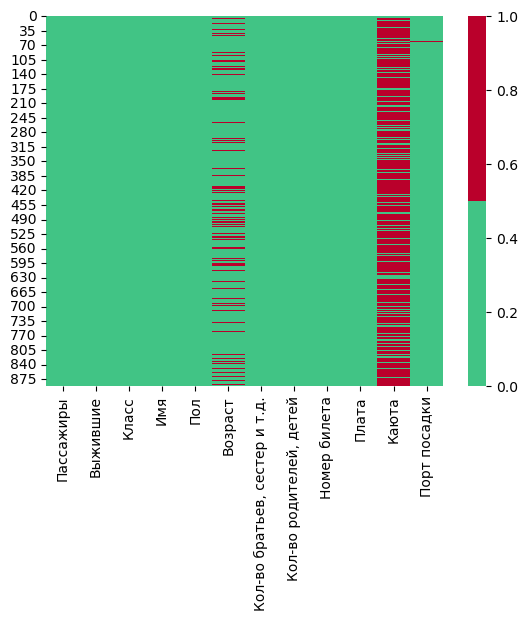

In [7]:
#тепловая карта  на пропущенные данные
colours = ['#41c485', '#ba002b'] # красный - пропущенные данные, зелёный - не пропущенные
sns.heatmap(dataset.isna(), cmap=sns.color_palette(colours))

In [8]:
print("Количество нулевых записей для каждого из столбцов:")
for col in dataset.columns[[1,2,5,6,7,9]]:
    print(f'{col} - {np.count_nonzero(dataset[col] == 0) }')
print("Количество отрицательных записей для каждого из столбцов:")
for col in dataset.columns[[1,2,5,6,7,9]]:
    print(f'{col} - {np.count_nonzero(dataset[col] < 0) }')
print("Количество незначащих записей для каждого из столбцов:")
for col in dataset.columns[:]:
    print(f'{col} - {np.count_nonzero(dataset[col].isna()) }')

Количество нулевых записей для каждого из столбцов:
Выжившие - 549
Класс - 0
Возраст - 0
Кол-во братьев, сестер и т.д. - 608
Кол-во родителей, детей - 678
Плата - 15
Количество отрицательных записей для каждого из столбцов:
Выжившие - 0
Класс - 0
Возраст - 0
Кол-во братьев, сестер и т.д. - 0
Кол-во родителей, детей - 0
Плата - 0
Количество незначащих записей для каждого из столбцов:
Пассажиры - 0
Выжившие - 0
Класс - 0
Имя - 0
Пол - 0
Возраст - 177
Кол-во братьев, сестер и т.д. - 0
Кол-во родителей, детей - 0
Номер билета - 0
Плата - 0
Каюта - 687
Порт посадки - 2


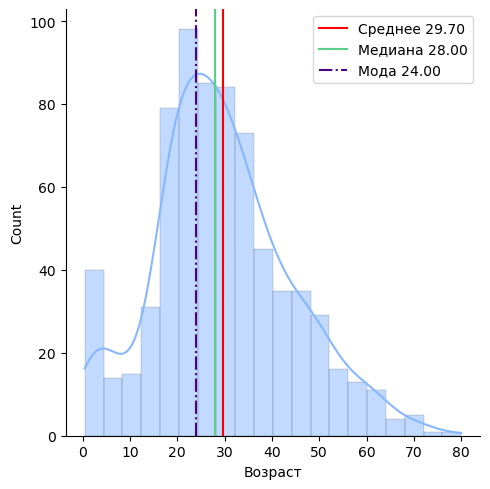

In [9]:
sns.displot(data = dataset, x = "Возраст", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Возраст"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Возраст'].mean()):.2f}")
plt.axvline(dataset["Возраст"].median(), ls="-", color="#59cf88", label=f"Медиана {dataset['Возраст'].median():.2f}")
plt.axvline(dataset["Возраст"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Возраст'].mode().iloc[0]:.2f}")
plt.legend()

<Axes: xlabel='Возраст'>

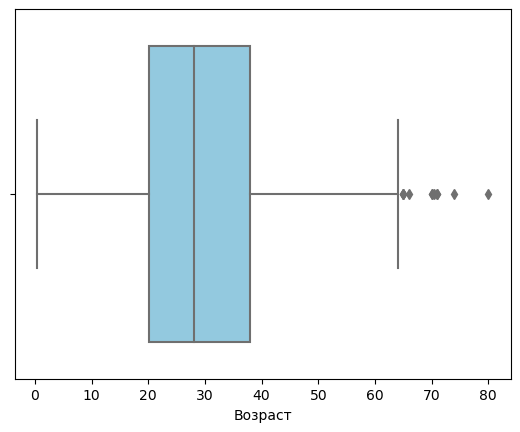

In [10]:
sns.boxplot(x = dataset["Возраст"],color='skyblue')

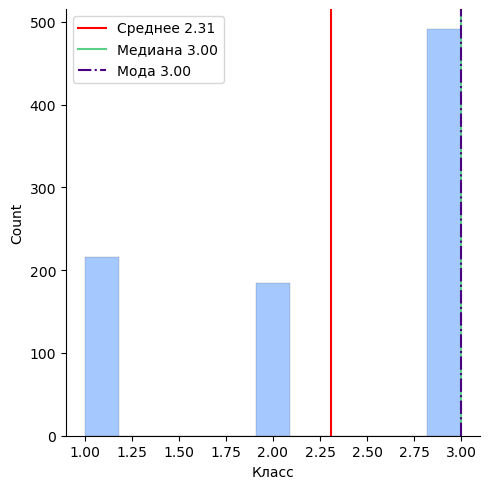

In [11]:
sns.displot(data = dataset, x = "Класс", color = "#87b7ff", linewidth = 0.1)
plt.axvline(dataset["Класс"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Класс'].mean()):.2f}")
plt.axvline(dataset["Класс"].median(), ls="-", color="#59cf88", label=f"Медиана {dataset['Класс'].median():.2f}")
plt.axvline(dataset["Класс"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Класс'].mode().iloc[0]:.2f}")
plt.legend()

<Axes: xlabel='Класс'>

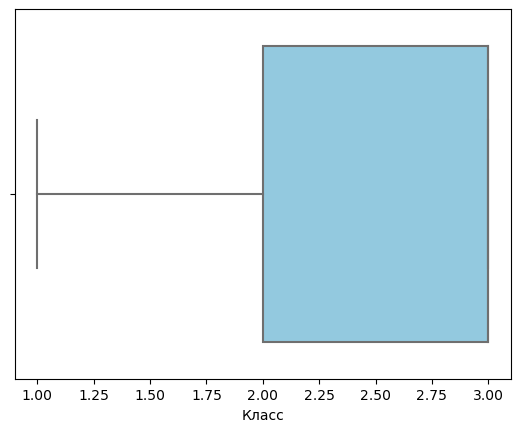

In [12]:
sns.boxplot(x = dataset["Класс"],color='skyblue')

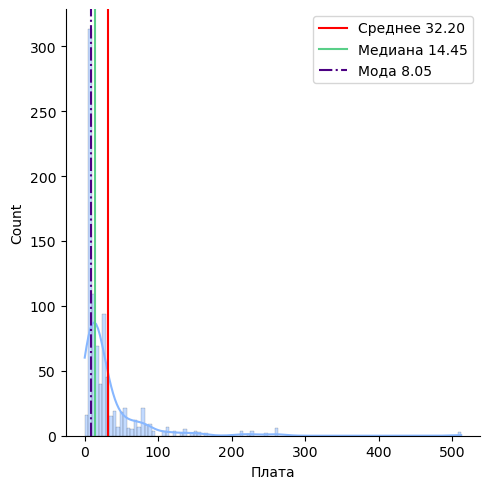

In [13]:
sns.displot(data = dataset, x = "Плата", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Плата"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Плата'].mean()):.2f}")
plt.axvline(dataset["Плата"].median(), ls="-", color="#59cf88", label=f"Медиана {dataset['Плата'].median():.2f}")
plt.axvline(dataset["Плата"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Плата'].mode().iloc[0]:.2f}")
plt.legend()

<Axes: xlabel='Плата'>

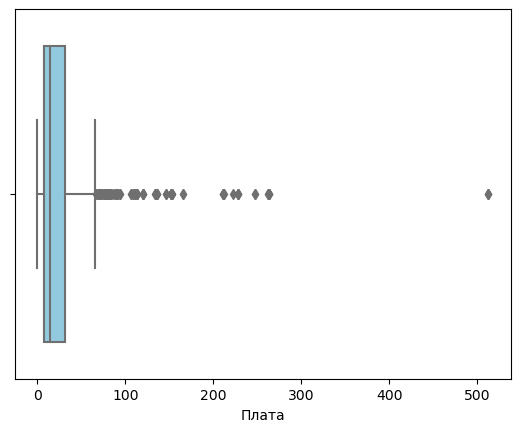

In [14]:
sns.boxplot(x = dataset["Плата"],color='skyblue')

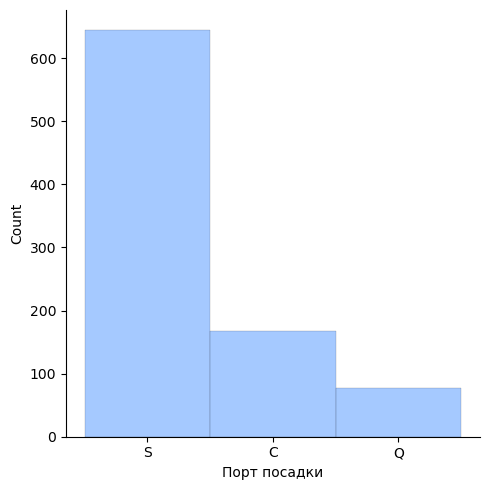

In [15]:
sns.displot(data = dataset, x = "Порт посадки", color = "#87b7ff", linewidth = 0.1)

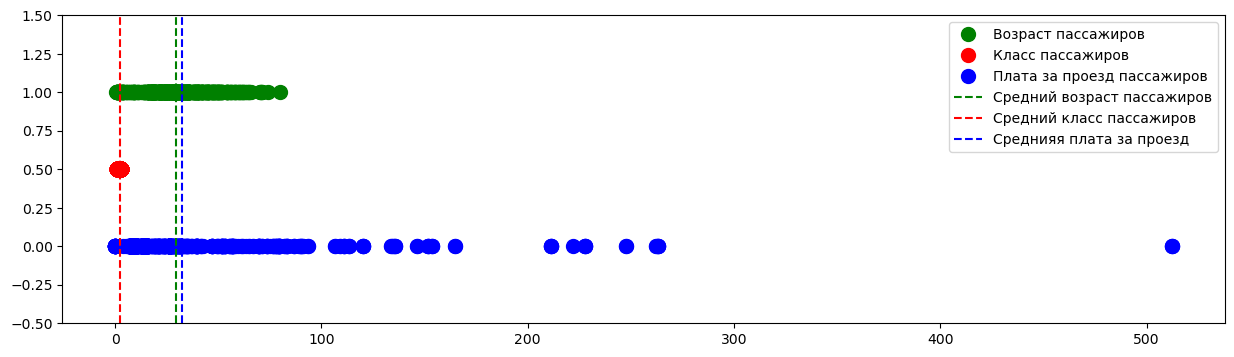

In [16]:
plt.figure(figsize=(15, 4))
plt.ylim(-0.5, 1.5)
plt.plot(dataset["Возраст"], [1 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="g", label="Возраст пассажиров")
plt.plot(dataset["Класс"], [0.5 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="r", label="Класс пассажиров")
plt.plot(dataset["Плата"], [0 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="b", label="Плата за проезд пассажиров")
plt.axvline(dataset["Возраст"].mean(), ls="--", color="g", label="Средний возраст пассажиров")
plt.axvline(dataset["Класс"].mean(), ls="--", color="r", label="Средний класс пассажиров")
plt.axvline(dataset["Плата"].mean(), ls="--", color="b", label="Среднияя плата за проезд")
plt.legend()

C:\Users\1\AppData\Local\Temp\ipykernel_5980\1626531991.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)


<Axes: >

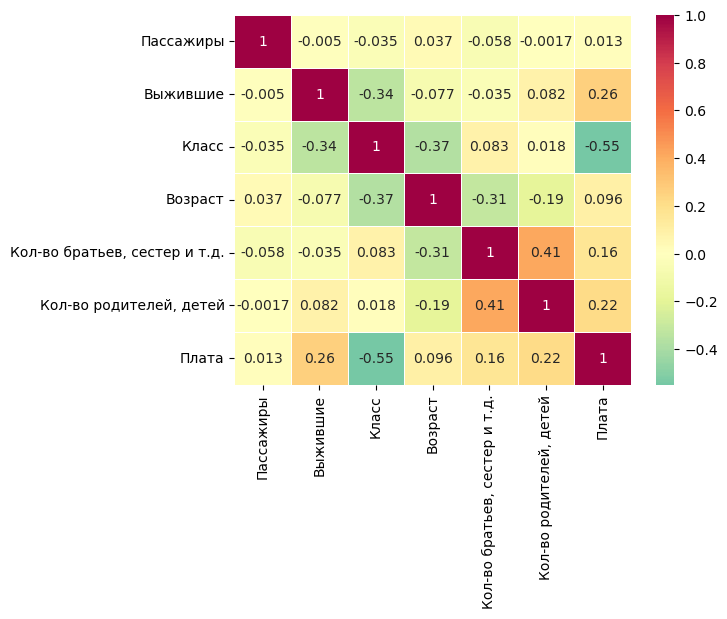

In [17]:
# Тепловая карта корреляции параметров

sns.heatmap(dataset.corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)

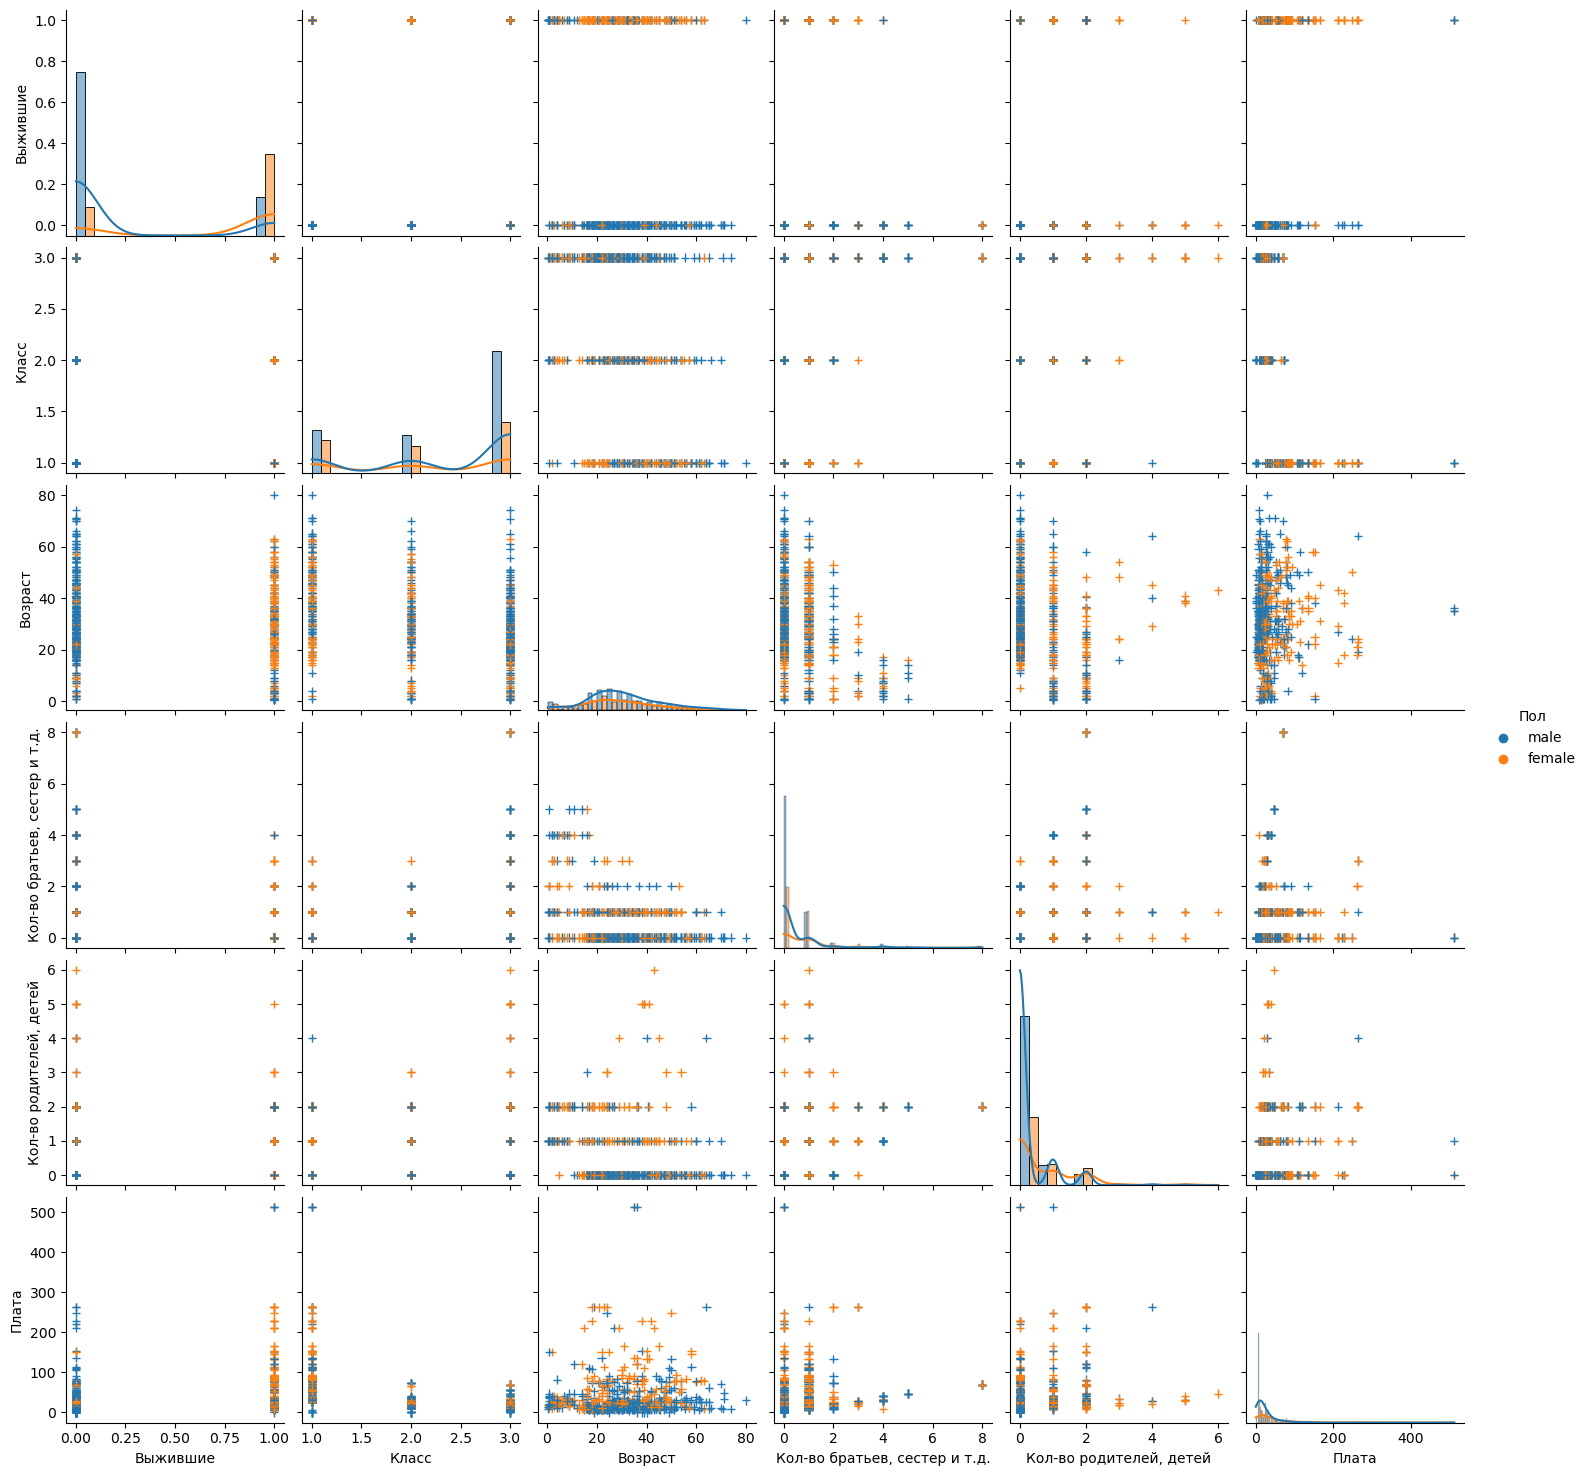

In [18]:
sns.pairplot(data=dataset, vars=dataset.columns[[1,2,5,6,7,9]], hue="Пол",plot_kws=dict(marker="+", linewidth=1), diag_kind="hist", diag_kws=dict(multiple="dodge", kde=True))

Отсечение выбросов и хвостов

In [19]:
# отсечение 5 процентов снизу и сверху
filtered_dataset = dataset[(dataset["Плата"] < dataset["Плата"].quantile(0.95)) & (dataset["Плата"] > dataset["Плата"].quantile(0.05))]

In [20]:
filtered_dataset.describe() # обработанные данные

,Пассажиры,Выжившие,Класс,Возраст,"Кол-во братьев, сестер и т.д.","Кол-во родителей, детей",Плата
count,791.000000,791.000000,791.000000,635.000000,791.000000,791.000000,791.000000
mean,442.026549,0.381795,2.357775,29.468110,0.547408,0.375474,24.500831
std,259.213427,0.486134,0.804851,14.692939,1.142932,0.804642,22.580489
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,7.229200
25%,213.500000,0.000000,2.000000,20.000000,0.000000,0.000000,8.050000
50%,447.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.500000
75%,664.500000,1.000000,3.000000,38.000000,1.000000,0.000000,29.412500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,110.883300


In [21]:
dataset.describe() # старые данные

,Пассажиры,Выжившие,Класс,Возраст,"Кол-во братьев, сестер и т.д.","Кол-во родителей, детей",Плата
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
dataset = filtered_dataset

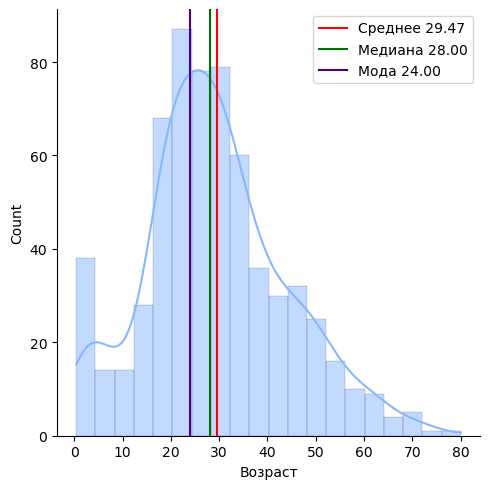

In [23]:
sns.displot(data = dataset, x = "Возраст", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Возраст"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Возраст'].mean()):.2f}")
plt.axvline(dataset["Возраст"].median(), ls="-", color="#007004", label=f"Медиана {dataset['Возраст'].median():.2f}")
plt.axvline(dataset["Возраст"].mode().iloc[0], ls="-", color="indigo", label=f"Мода {dataset['Возраст'].mode().iloc[0]:.2f}")
plt.legend()

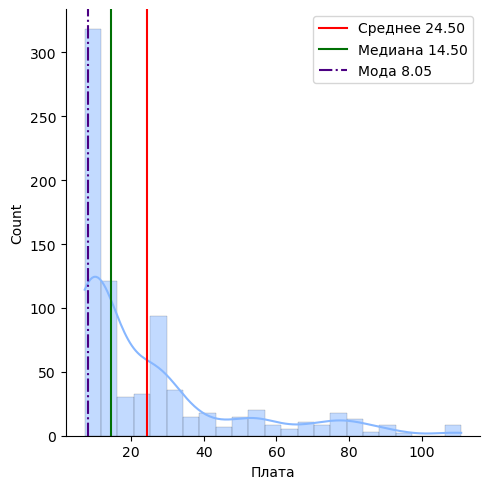

In [24]:
sns.displot(data = dataset, x = "Плата", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Плата"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Плата'].mean()):.2f}")
plt.axvline(dataset["Плата"].median(), ls="-", color="#007004", label=f"Медиана {dataset['Плата'].median():.2f}")
plt.axvline(dataset["Плата"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Плата'].mode().iloc[0]:.2f}")
plt.legend()

<Axes: xlabel='Плата'>

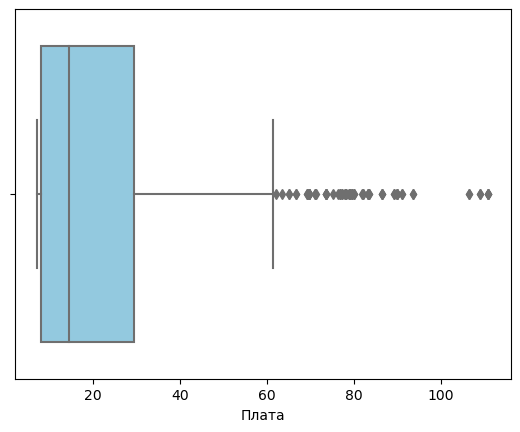

In [25]:
sns.boxplot(x = dataset["Плата"],color='skyblue')

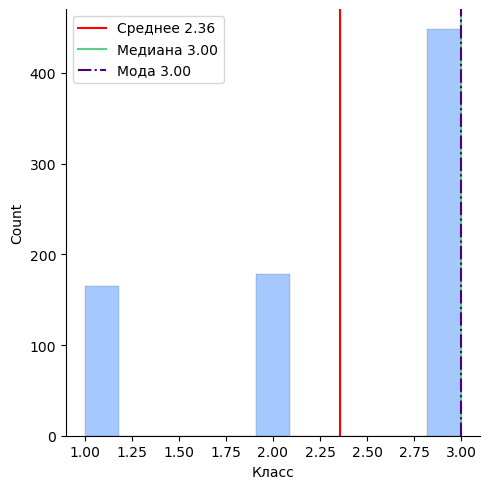

In [26]:
sns.displot(data = dataset, x = "Класс", color = "#87b7ff", linewidth = 0.1)
plt.axvline(dataset["Класс"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Класс'].mean()):.2f}")
plt.axvline(dataset["Класс"].median(), ls="-", color="#59cf88", label=f"Медиана {dataset['Класс'].median():.2f}")
plt.axvline(dataset["Класс"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Класс'].mode().iloc[0]:.2f}")
plt.legend()

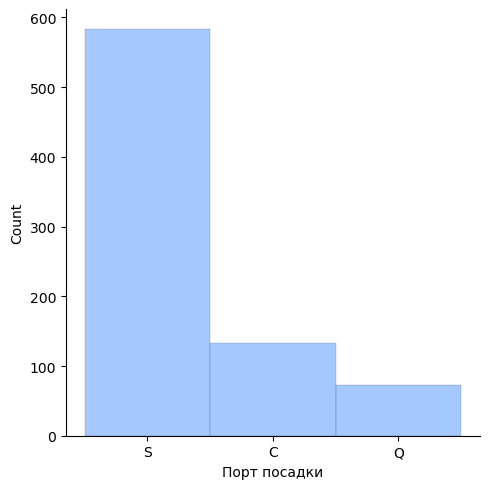

In [27]:
sns.displot(data = dataset, x = "Порт посадки", color = "#87b7ff", linewidth = 0.1)

C:\Users\1\AppData\Local\Temp\ipykernel_5980\4103285948.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)


<Axes: >

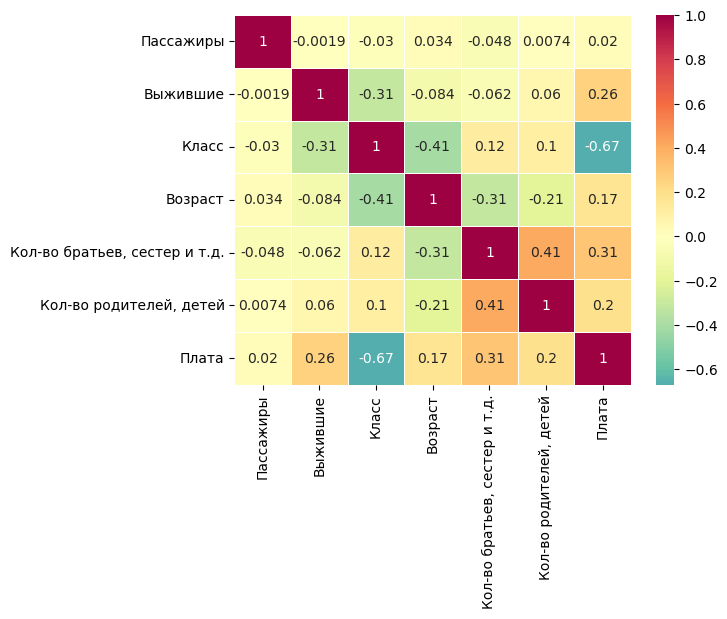

In [28]:
sns.heatmap(dataset.corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)

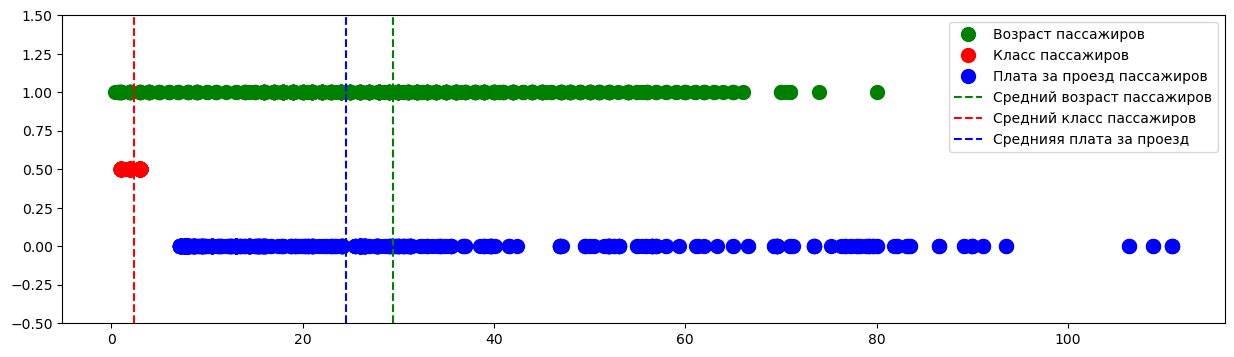

In [29]:
plt.figure(figsize=(15, 4))
plt.ylim(-0.5, 1.5)
plt.plot(dataset["Возраст"], [1 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="g", label="Возраст пассажиров")
plt.plot(dataset["Класс"], [0.5 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="r", label="Класс пассажиров")
plt.plot(dataset["Плата"], [0 for _ in range((len(dataset)))], ls="", marker="o", ms=10, color="b", label="Плата за проезд пассажиров")
plt.axvline(dataset["Возраст"].mean(), ls="--", color="g", label="Средний возраст пассажиров")
plt.axvline(dataset["Класс"].mean(), ls="--", color="r", label="Средний класс пассажиров")
plt.axvline(dataset["Плата"].mean(), ls="--", color="b", label="Среднияя плата за проезд")
plt.legend()

Отсечение 5 процентов помогло избавиться от данных предположительно являющихся ошибкой ввода и не повлияло в значительной степени на другие данные, кроме тех по которым они отсеивались.

Заполнение пропущенных данных

In [30]:
# до заполнения

dataset.describe()

new_dataset = deepcopy(dataset)

In [31]:
# заполнение пропущенных данных средними значениями

#new_dataset.loc[new_dataset["Возраст"].isna(), "Возраст"] = new_dataset["Возраст"].median()
new_dataset.loc[new_dataset["Возраст"].isna(), "Возраст"] = new_dataset["Возраст"].mean()
#new_dataset.loc[new_dataset["Возраст"].isna(), "Возраст"] = new_dataset["Возраст"].mode()


In [32]:
new_dataset.describe()

,Пассажиры,Выжившие,Класс,Возраст,"Кол-во братьев, сестер и т.д.","Кол-во родителей, детей",Плата
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,442.026549,0.381795,2.357775,29.468110,0.547408,0.375474,24.500831
std,259.213427,0.486134,0.804851,13.162542,1.142932,0.804642,22.580489
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,7.229200
25%,213.500000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
50%,447.000000,0.000000,3.000000,29.468110,0.000000,0.000000,14.500000
75%,664.500000,1.000000,3.000000,35.000000,1.000000,0.000000,29.412500
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,110.883300


In [33]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Пассажиры                      791 non-null    int64  
 1   Выжившие                       791 non-null    int64  
 2   Класс                          791 non-null    int64  
 3   Имя                            791 non-null    object 
 4   Пол                            791 non-null    object 
 5   Возраст                        791 non-null    float64
 6   Кол-во братьев, сестер и т.д.  791 non-null    int64  
 7   Кол-во родителей, детей        791 non-null    int64  
 8   Номер билета                   791 non-null    object 
 9   Плата                          791 non-null    float64
 10  Каюта                          163 non-null    object 
 11  Порт посадки                   789 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 1

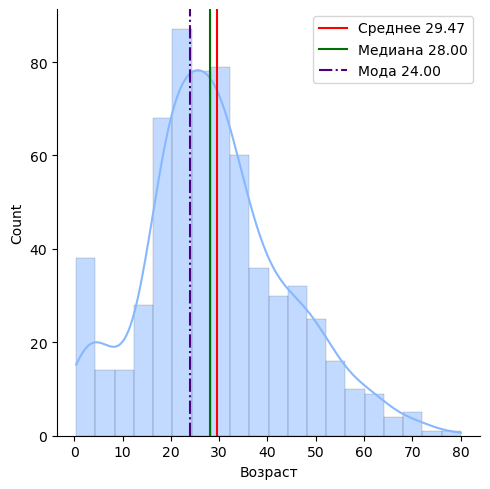

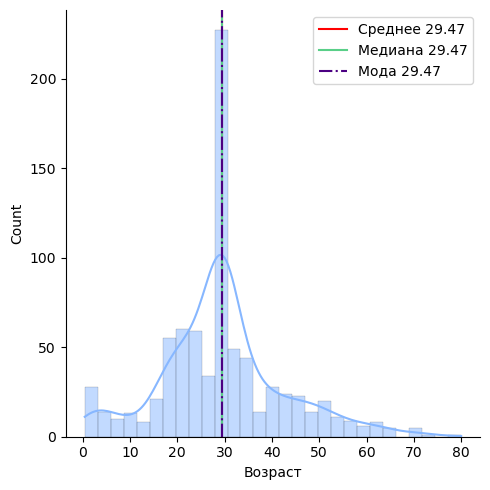

In [34]:
# старые данные
sns.displot(data = dataset, x = "Возраст", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(dataset["Возраст"].mean(), ls="-", color="r", label=f"Среднее {(dataset['Возраст'].mean()):.2f}")
plt.axvline(dataset["Возраст"].median(), ls="-", color="#007004", label=f"Медиана {dataset['Возраст'].median():.2f}")
plt.axvline(dataset["Возраст"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {dataset['Возраст'].mode().iloc[0]:.2f}")
plt.legend()
# новые данные
sns.displot(data = new_dataset, x = "Возраст", color = "#87b7ff", linewidth = 0.1, kde=True)
plt.axvline(new_dataset["Возраст"].mean(), ls="-", color="r", label=f"Среднее {(new_dataset['Возраст'].mean()):.2f}")
plt.axvline(new_dataset["Возраст"].median(), ls="-", color="#59cf88", label=f"Медиана {new_dataset['Возраст'].median():.2f}")
plt.axvline(new_dataset["Возраст"].mode().iloc[0], ls="-.", color="indigo", label=f"Мода {new_dataset['Возраст'].mode().iloc[0]:.2f}")
plt.legend()

<Axes: xlabel='Возраст'>

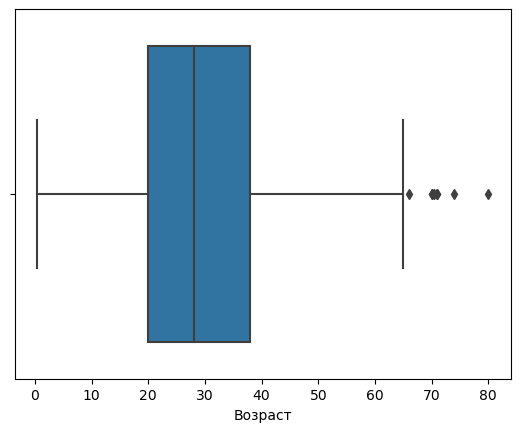

In [35]:
sns.boxplot(x = dataset["Возраст"])

<Axes: xlabel='Возраст'>

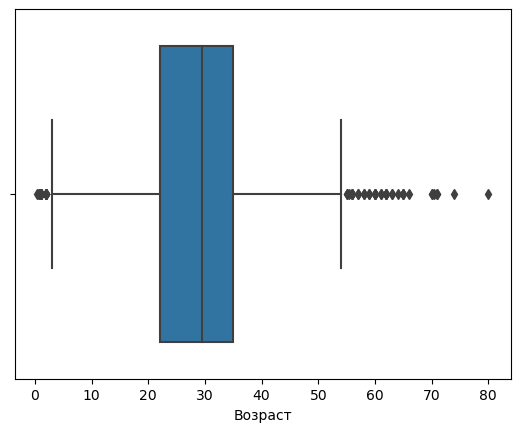

In [36]:
sns.boxplot(x = new_dataset["Возраст"])

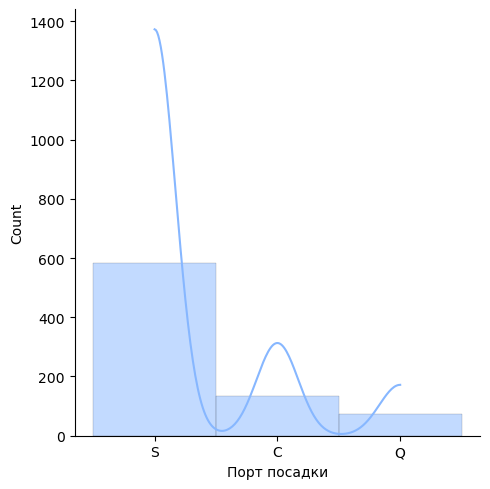

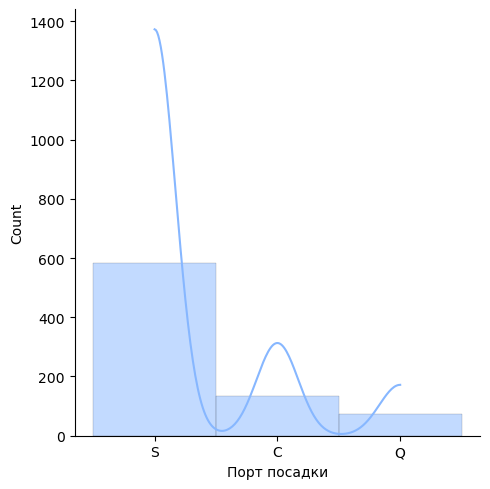

In [37]:
# старые данные
sns.displot(data = dataset, x = "Порт посадки", color = "#87b7ff", linewidth = 0.1, kde=True)
# новые данные
sns.displot(data = new_dataset, x = "Порт посадки", color = "#87b7ff", linewidth = 0.1, kde=True)

Так как сильно меняется внешний вид графика (нормальность) или не меняется вовсе, а средние показатели меняются незначительно, то заполнение пропущенных данных не имеет смысла.

Анализ данных (если это не надо, то в отчёт не вставлять)

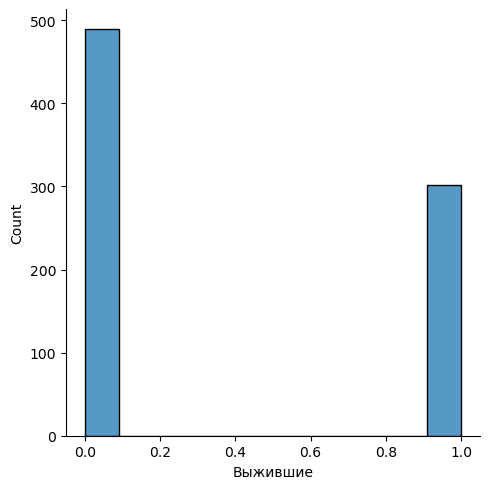

In [38]:
sns.displot(data = dataset, x = "Выжившие")

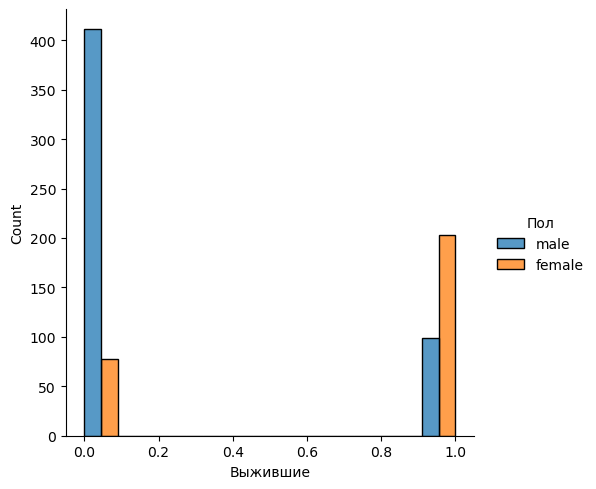

In [39]:
sns.displot(data = dataset, x = "Выжившие", hue = "Пол", multiple="dodge")


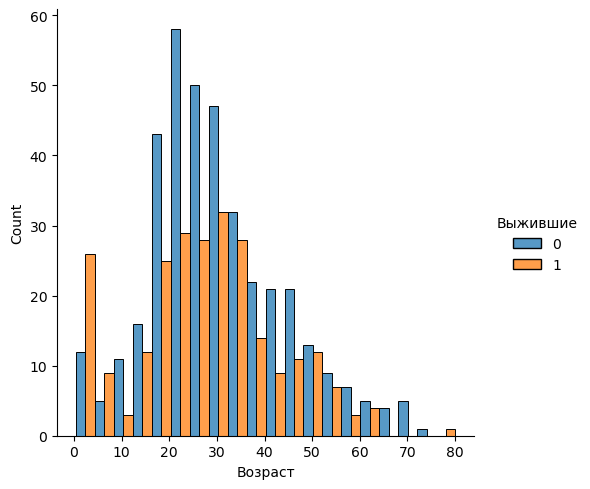

In [40]:
sns.displot(data = dataset, x = "Возраст", hue = "Выжившие", multiple="dodge")

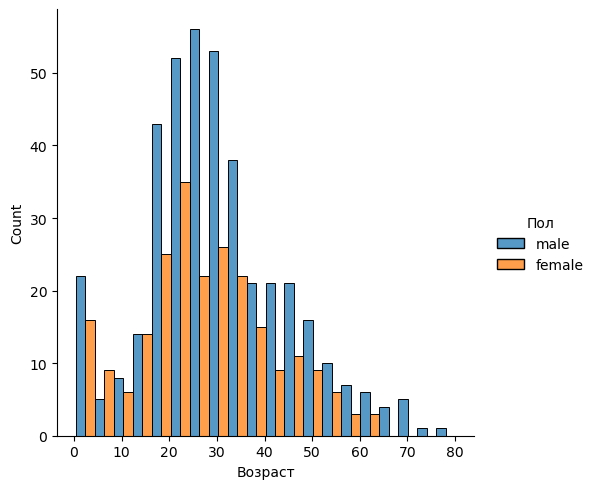

In [41]:
sns.displot(data = dataset, x = "Возраст", hue = "Пол", multiple="dodge")

Text(0.5, 1.0, 'Выжили')

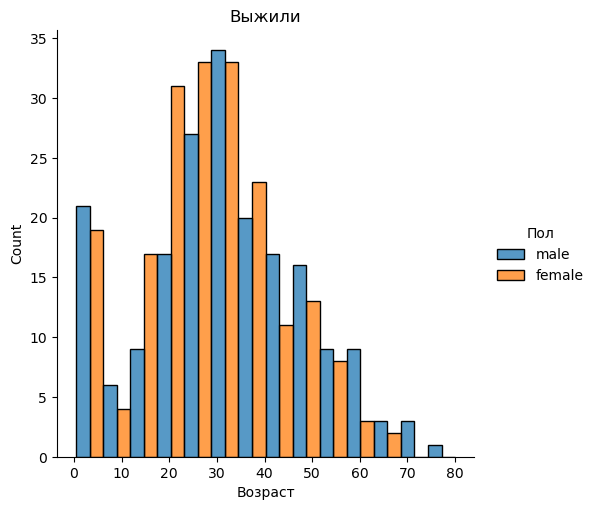

In [42]:
sns.displot(data = dataset[(dataset == 1).any(axis=1)], x = "Возраст", hue = "Пол", multiple="dodge")
plt.title("Выжили")

Text(0.5, 1.0, 'Погибли')

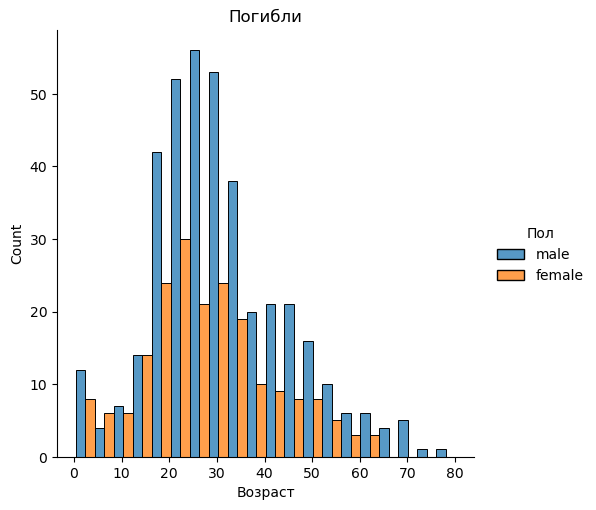

In [43]:
sns.displot(data = dataset[(dataset == 0).any(axis=1)], x = "Возраст", hue = "Пол", multiple="dodge")
plt.title("Погибли")

 Тесты

Тесты на нормальность

Выжившие:
  statistic: 0.6159343719482422
  p value: 1.3321715703005952e-38
Класс:
  statistic: 0.7156322002410889
  p value: 1.4927631459684778e-34
Возраст:
  statistic: 0.9795682430267334
  p value: 9.568150716177115e-08
Кол-во братьев, сестер и т.д.:
  statistic: 0.5164464712142944
  p value: 7.279745522167425e-42
Кол-во родителей, детей:
  statistic: 0.5260797142982483
  p value: 1.4211969025182295e-41
Плата:
  statistic: 0.752095639705658
  p value: 8.809610169123166e-33


<Axes: xlabel='Номер', ylabel='Значения'>

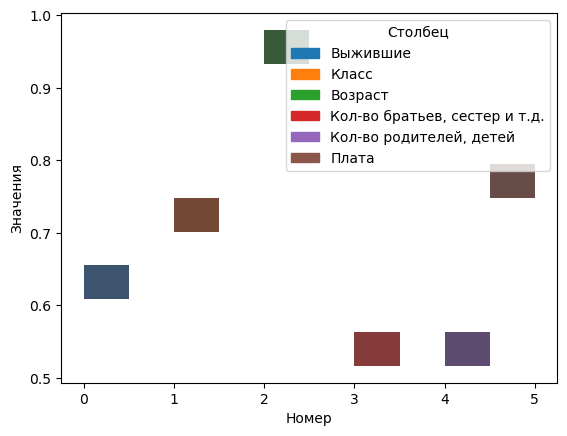

In [44]:
# Тест Шапиро-Вилка
from scipy.stats import shapiro
lst1 = []
lst2 = []
for name in dataset.columns[[1,2,5,6,7,9]].values:
    stat = shapiro(dataset[name].loc[dataset[name].isna() == False])
    lst1 = lst1 + [stat.statistic]
    lst2 = lst2 + [stat.pvalue]
    print(f"{name}:")
    print(f"  statistic: {stat.statistic}")
    print(f"  p value: {stat.pvalue}")    
lst1 = zip(lst1, list(dataset.columns[[1,2,5,6,7,9]].values), range(len(lst1)))
sns.histplot(data = pd.DataFrame(lst1, columns=["Значения","Столбец", "Номер"]), x = "Номер", bins = 10, y = "Значения", hue = "Столбец")

In [45]:
# Тест д'Агостино на K ^ 2
from scipy.stats import normaltest
for name in dataset.columns[[1,2,5,6,7,9]].values:
    stat = normaltest(dataset[name].loc[dataset[name].isna() == False])
    print(f"{name}:")
    print(f"  statistic: {stat.statistic}")
    print(f"  p value: {stat.pvalue}")

Выжившие:
  statistic: 3703.354540465514
  p value: 0.0
Класс:
  statistic: 296.02580023839175
  p value: 5.2337651102028e-65
Возраст:
  statistic: 17.929604553635464
  p value: 0.00012783089800463615
Кол-во братьев, сестер и т.д.:
  statistic: 634.4344822631131
  p value: 1.7151519917563457e-138
Кол-во родителей, детей:
  statistic: 507.6099847147128
  p value: 5.9414485363444e-111
Плата:
  statistic: 248.94142088965944
  p value: 8.771165289943335e-55


In [46]:
# Тест Андерсона-Дарлинга
from scipy.stats import anderson
for name in dataset.columns[[1,2,5,6,7,9]].values:
    stat = anderson(dataset[name].loc[dataset[name].isna() == False])
    print(f"{name}:")
    print(f"  statistic: {stat.statistic}")
    print(f"  critical_values: {stat.critical_values}")    
    print(f"  significance_level: {stat.significance_level}")  

Выжившие:
  statistic: 152.57272947860065
  critical_values: [0.573 0.653 0.783 0.913 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]
Класс:
  statistic: 98.92758847521236
  critical_values: [0.573 0.653 0.783 0.913 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]
Возраст:
  statistic: 3.8027483186297104
  critical_values: [0.572 0.652 0.782 0.912 1.085]
  significance_level: [15.  10.   5.   2.5  1. ]
Кол-во братьев, сестер и т.д.:
  statistic: 129.3894156077605
  critical_values: [0.573 0.653 0.783 0.913 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]
Кол-во родителей, детей:
  statistic: 155.7774610288369
  critical_values: [0.573 0.653 0.783 0.913 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]
Плата:
  statistic: 68.79841157402643
  critical_values: [0.573 0.653 0.783 0.913 1.087]
  significance_level: [15.  10.   5.   2.5  1. ]


Корреляционные тесты

Выжившие - Выжившие:
  statistic: 1.0
  p value: 0.0
Выжившие - Класс:
  statistic: -0.3139701206750452
  p value: 1.4818135884928438e-19
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: -0.062234962478134065
  p value: 0.08024454867860606
Выжившие - Кол-во родителей, детей:
  statistic: 0.060212484238505615
  p value: 0.09058555042547034
Выжившие - Плата:
  statistic: 0.25570087425492577
  p value: 2.8379572757309107e-13
Класс - Выжившие:
  statistic: -0.3139701206750452
  p value: 1.4818135884928438e-19
Класс - Класс:
  statistic: 1.0
  p value: 0.0
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 0.11570381437048953
  p value: 0.0011143340848434105
Класс - Кол-во родителей, детей:
  statistic: 0.10308657117984692
  p value: 0.003702775980807892
Класс - Плата:
  statistic: -0.6702557802065252
  p value: 2.7235903964631778e-104
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: -0.062234962478134065
  p value: 0.08024454867860606
Кол-во братьев, сестер и т.д. - Класс:
  s

<Axes: >

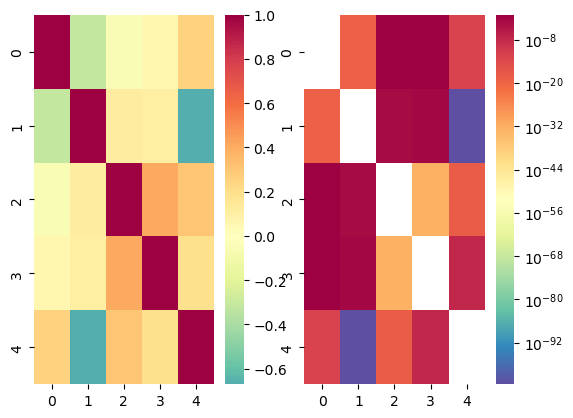

In [47]:
# Коэффициент корреляции Пирсона
from scipy.stats import pearsonr
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = pearsonr(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.statistic
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.statistic}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Выжившие - Выжившие:
  statistic: 1.0
  p value: 0.0
Выжившие - Класс:
  statistic: -0.31713529942917007
  p value: 6.115806315787351e-20
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: 0.05831837936207202
  p value: 0.1012154513703228
Выжившие - Кол-во родителей, детей:
  statistic: 0.11439233927815466
  p value: 0.0012696655404294743
Выжившие - Плата:
  statistic: 0.25830302063094046
  p value: 1.59735689415887e-13
Класс - Выжившие:
  statistic: -0.31713529942917007
  p value: 6.115806315787351e-20
Класс - Класс:
  statistic: 1.0
  p value: 0.0
Класс - Кол-во братьев, сестер и т.д.:
  statistic: -0.008134103047347381
  p value: 0.8193264394828312
Класс - Кол-во родителей, детей:
  statistic: 0.05784560274490851
  p value: 0.10401772605082577
Класс - Плата:
  statistic: -0.6826530397932508
  p value: 1.3446053744897224e-109
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 0.05831837936207202
  p value: 0.1012154513703228
Кол-во братьев, сестер и т.д. - Класс:
  statistic:

<Axes: >

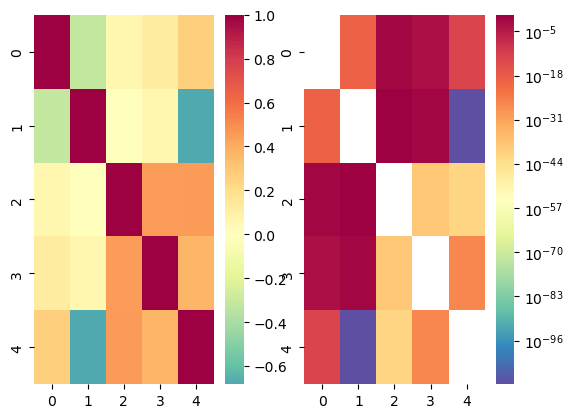

In [48]:
# Ранговая корреляция Спирмена
from scipy.stats import spearmanr
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = spearmanr(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.correlation
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.correlation}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Выжившие - Выжившие:
  statistic: 1.0
  p value: 8.0585731618452145e-174
Выжившие - Класс:
  statistic: -0.3023812942210846
  p value: 4.935618454336319e-19
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: 0.056308671061580655
  p value: 0.10118179278700294
Выжившие - Кол-во родителей, детей:
  statistic: 0.1108723190593535
  p value: 0.001303452838108895
Выжившие - Плата:
  statistic: 0.21272253075789094
  p value: 3.867837996393349e-13
Класс - Выжившие:
  statistic: -0.3023812942210846
  p value: 4.935618454336319e-19
Класс - Класс:
  statistic: 1.0
  p value: 7.215701859115411e-210
Класс - Кол-во братьев, сестер и т.д.:
  statistic: -0.006889471501474042
  p value: 0.8334048057193892
Класс - Кол-во родителей, детей:
  statistic: 0.054087829393058624
  p value: 0.09996424957793683
Класс - Плата:
  statistic: -0.5695799552684289
  p value: 2.1927733119690543e-92
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 0.056308671061580655
  p value: 0.10118179278700294
Кол-во брат

<Axes: >

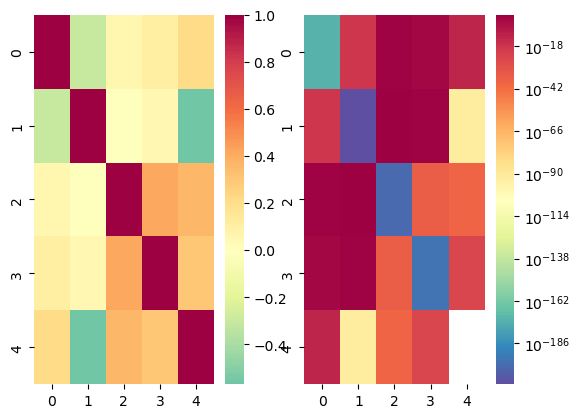

In [49]:
# Ранговая корреляция Кендалла
from scipy.stats import kendalltau
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = kendalltau(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.correlation
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.correlation}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

In [50]:
# Тест хи-квадрат
from scipy.stats import chi2_contingency
from matplotlib.colors import LogNorm
dataset.columns[[1,2,6,7,9]].values
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = chi2_contingency(pd.crosstab(dataset[name], dataset[other_name]))
        print(f"{name} - {other_name}:")
        print(f"  {stat.statistic}")

Выжившие - Выжившие:
  786.768881117428
Выжившие - Класс:
  79.55467240287291
Выжившие - Кол-во братьев, сестер и т.д.:
  32.16897641479175
Выжившие - Кол-во родителей, детей:
  19.238080121613685
Выжившие - Плата:
  362.7132733783117
Класс - Выжившие:
  79.55467240287291
Класс - Класс:
  1582.0
Класс - Кол-во братьев, сестер и т.д.:
  50.88216031770535
Класс - Кол-во родителей, детей:
  18.513147599872546
Класс - Плата:
  1533.8291532859535
Кол-во братьев, сестер и т.д. - Выжившие:
  32.16897641479175
Кол-во братьев, сестер и т.д. - Класс:
  50.882160317705356
Кол-во братьев, сестер и т.д. - Кол-во братьев, сестер и т.д.:
  4746.000000000001
Кол-во братьев, сестер и т.д. - Кол-во родителей, детей:
  336.5511518602351
Кол-во братьев, сестер и т.д. - Плата:
  3520.561772114536
Кол-во родителей, детей - Выжившие:
  19.238080121613688
Кол-во родителей, детей - Класс:
  18.513147599872546
Кол-во родителей, детей - Кол-во братьев, сестер и т.д.:
  336.551151860235
Кол-во родителей, детей - 

Параметрические статистические проверки гипотез

Выжившие - Выжившие:
  statistic: 0.0
  p value: 1.0
Выжившие - Класс:
  statistic: -59.10406991751883
  p value: 0.0
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: -3.750192255948951
  p value: 0.0001830742305155984
Выжившие - Кол-во родителей, детей:
  statistic: 0.1891084649322441
  p value: 0.8500320952088777
Выжившие - Плата:
  statistic: -30.03407251206083
  p value: 3.6413089748144495e-157
Класс - Выжившие:
  statistic: 59.10406991751883
  p value: 0.0
Класс - Класс:
  statistic: 0.0
  p value: 1.0
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 36.42367760608272
  p value: 2.1248007272154017e-211
Класс - Кол-во родителей, детей:
  statistic: 48.987345439865784
  p value: 2.9132e-319
Класс - Плата:
  statistic: -27.562382944769418
  p value: 7.09581751669128e-137
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 3.750192255948951
  p value: 0.0001830742305155984
Кол-во братьев, сестер и т.д. - Класс:
  statistic: -36.42367760608272
  p value: 2.1248007272154017e

<Axes: >

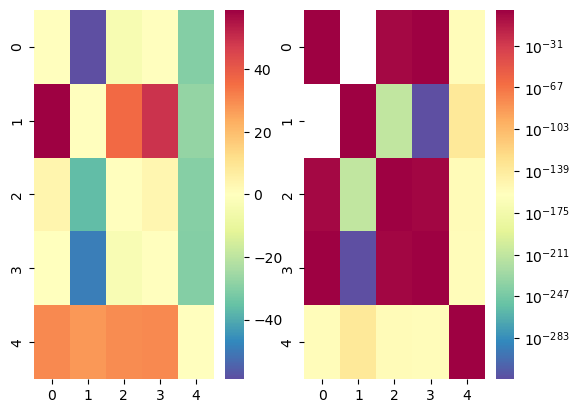

In [51]:
# т-тест Стьюдента
from scipy.stats import ttest_ind
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = ttest_ind(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.statistic
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.statistic}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Выжившие - Выжившие:
  statistic: nan
  p value: nan
Выжившие - Класс:
  statistic: -52.28409053308829
  p value: 1.0225342452036553e-258
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: -3.668854022849967
  p value: 0.00025998879945137213
Выжившие - Кол-во родителей, детей:
  statistic: 0.1943591368016716
  p value: 0.845944651388483
Выжившие - Плата:
  statistic: -30.20070921873605
  p value: 8.190607283790498e-134
Класс - Выжившие:
  statistic: 52.28409053308829
  p value: 1.0225342452036553e-258
Класс - Класс:
  statistic: nan
  p value: nan
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 38.585962948646404
  p value: 6.428593114674658e-184
Класс - Кол-во родителей, детей:
  statistic: 51.72596983241447
  p value: 7.251299919669717e-256
Класс - Плата:
  statistic: -26.92738197859305
  p value: 7.991513765840097e-114
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 3.668854022849967
  p value: 0.00025998879945137213
Кол-во братьев, сестер и т.д. - Класс:
  statistic:

<Axes: >

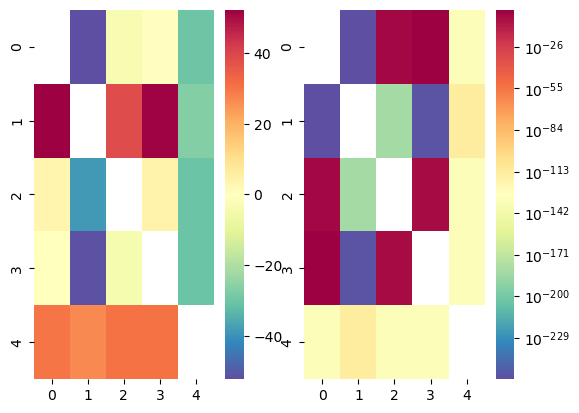

In [52]:
# Парный т-тест Стьюдента
from scipy.stats import ttest_rel
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = ttest_rel(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.statistic
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.statistic}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Непараметрические статистические проверки гипотез

Выжившие - Выжившие:
  statistic: 312840.5
  p value: 1.0
Выжившие - Класс:
  statistic: 24915.0
  p value: 2.9632680782846286e-239
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: 319579.0
  p value: 0.37568464479467367
Выжившие - Кол-во родителей, детей:
  statistic: 345998.5
  p value: 6.3402469883307304e-06
Выжившие - Плата:
  statistic: 0.0
  p value: 1.2620504531572078e-269
Класс - Выжившие:
  statistic: 600766.0
  p value: 2.9632680782846286e-239
Класс - Класс:
  statistic: 312840.5
  p value: 1.0
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 572472.5
  p value: 2.745428841147738e-194
Класс - Кол-во родителей, детей:
  statistic: 590224.5
  p value: 3.305028219001193e-224
Класс - Плата:
  statistic: 0.0
  p value: 1.5149503346087645e-266
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 306102.0
  p value: 0.37568464479467367
Кол-во братьев, сестер и т.д. - Класс:
  statistic: 53208.5
  p value: 2.745428841147738e-194
Кол-во братьев, сестер и т.д. - Кол-во брать

<Axes: >

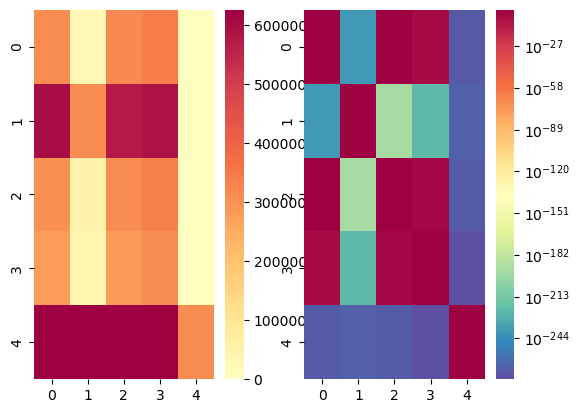

In [53]:
# U-тест Манна-Уитни
from scipy.stats import mannwhitneyu
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(5)]
p_mat = [[0 for _ in range(5)] for _ in range(5)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        stat = mannwhitneyu(dataset[name], dataset[other_name])
        stat_mat[i//5][i%5] = stat.statistic
        p_mat[i//5][i%5] = stat.pvalue
        i += 1
        print(f"{name} - {other_name}:")
        print(f"  statistic: {stat.statistic}")
        print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

Выжившие - Класс:
  statistic: 0.0
  p value: 6.949243632129216e-119
Выжившие - Кол-во братьев, сестер и т.д.:
  statistic: 27021.5
  p value: 0.08227803854488397
Выжившие - Кол-во родителей, детей:
  statistic: 27310.0
  p value: 0.3146791778409309
Выжившие - Плата:
  statistic: 0.0
  p value: 3.975239213346213e-131
Класс - Выжившие:
  statistic: 0.0
  p value: 6.949243632129216e-119
Класс - Кол-во братьев, сестер и т.д.:
  statistic: 8563.5
  p value: 6.866560946741069e-107
Класс - Кол-во родителей, детей:
  statistic: 3400.5
  p value: 1.2492908240063903e-122
Класс - Плата:
  statistic: 0.0
  p value: 3.88826645776488e-131
Кол-во братьев, сестер и т.д. - Выжившие:
  statistic: 27021.5
  p value: 0.08227803854488397
Кол-во братьев, сестер и т.д. - Класс:
  statistic: 8563.5
  p value: 6.866560946741069e-107
Кол-во братьев, сестер и т.д. - Кол-во родителей, детей:
  statistic: 12067.5
  p value: 8.853624663937182e-06
Кол-во братьев, сестер и т.д. - Плата:
  statistic: 0.0
  p value: 3

<Axes: >

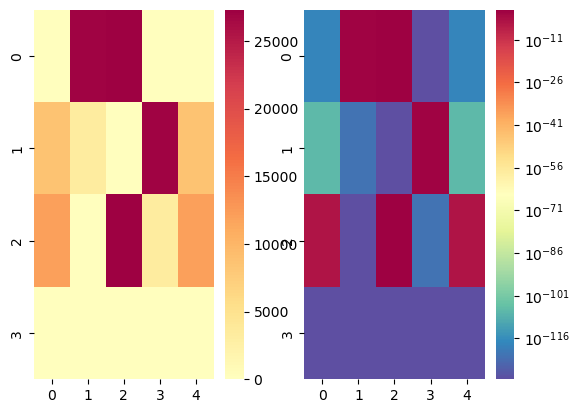

In [54]:
# Тест Уилкоксона со знаком
from scipy.stats import wilcoxon
from matplotlib.colors import LogNorm
stat_mat = [[0 for _ in range(5)] for _ in range(4)]
p_mat = [[0 for _ in range(5)] for _ in range(4)]
i = 0
for name in dataset.columns[[1,2,6,7,9]].values:
    for other_name in dataset.columns[[1,2,6,7,9]].values:
        if(name != other_name):
            stat = wilcoxon(dataset[name], dataset[other_name])
            stat_mat[i//5][i%5] = stat.statistic
            p_mat[i//5][i%5] = stat.pvalue
            i += 1
            print(f"{name} - {other_name}:")
            print(f"  statistic: {stat.statistic}")
            print(f"  p value: {stat.pvalue}")
plt.subplot(1, 2, 1)
sns.heatmap(stat_mat, center = 0, cmap = "Spectral_r")
plt.subplot(1, 2, 2)
sns.heatmap(p_mat, norm=LogNorm(), cmap = "Spectral_r")

<Axes: >

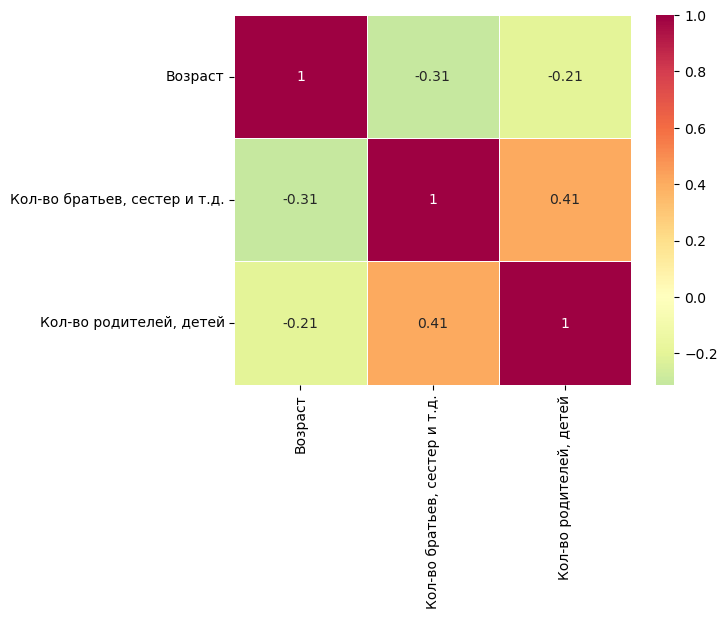

In [55]:
sns.heatmap(data = dataset[dataset.columns[[5,6,7]]].corr(), annot=True, cmap="Spectral_r", linewidths=.5, center = 0)

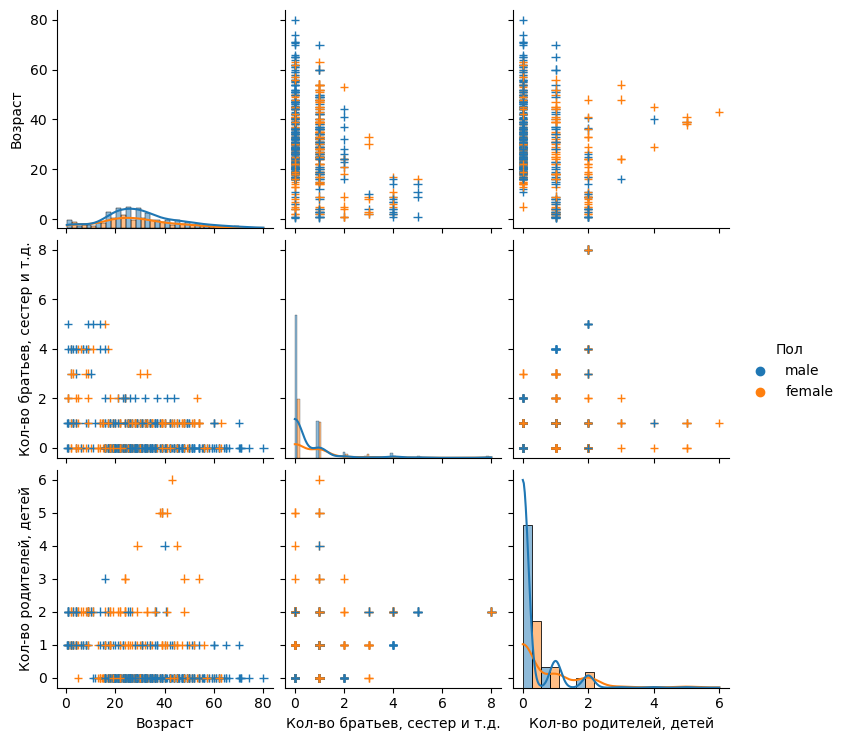

In [56]:
sns.pairplot(data=dataset, vars=dataset.columns[[5,6,7]], hue="Пол",plot_kws=dict(marker="+", linewidth=1), diag_kind="hist", diag_kws=dict(multiple="dodge", kde=True))